## 9장. 그래프와 시각화

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
%matplotlib inline

In [44]:
## matplotlib 활용 

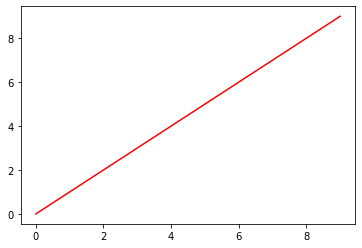

In [2]:
data = np.arange(10)
plt.plot(data, 'red')   ## 'red'로 색깔지정 

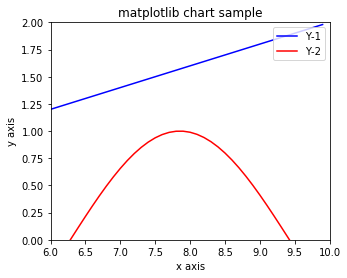

In [29]:
x = np.arange(1,10,0.1)
y1 = x*0.2
y2 = np.sin(x)

## 차트크기 지정
plt.figure(figsize=(5,4))

# 색깔과 lable 지정 
plt.plot(x,y1,'blue', label='Y-1')
plt.plot(x,y2,'red', label='Y-2')

## x, y축 name 및 출력범위 지정 
plt.xlabel('x axis')
plt.ylabel('y axis')
plt.xlim(6, 10)
plt.ylim(0,2)

## 제목과 범례위치 지정 
plt.title('matplotlib chart sample')
plt.legend(loc='upper right')

plt.show()

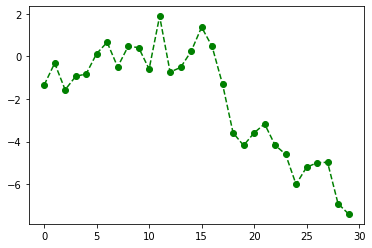

In [4]:
from numpy.random import randn 
plt.plot(randn(30).cumsum(), 'green', linestyle = 'dashed', marker = 'o')  ## 선과 마커 타입 설정 
plt.show()

C:\Users\youngboo.choi\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:5: MatplotlibDeprecationWarning: Unrecognized location 'upper'. Falling back on 'best'; valid locations are
	best
	upper right
	upper left
	lower left
	lower right
	right
	center left
	center right
	lower center
	upper center
	center
This will raise an exception in 3.3.
  """


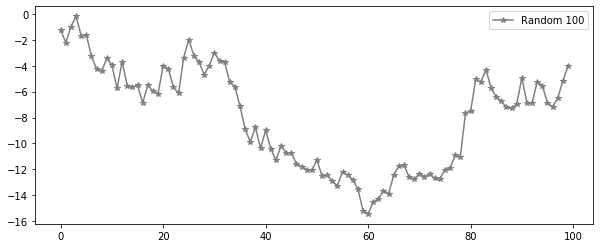

In [30]:
data1 = np.random.randn(100).cumsum()

plt.figure(figsize=(10,4))
plt.plot(data1, 'grey', label = 'Random 100', marker = '*')
plt.legend(loc = 'upper')
plt.show()

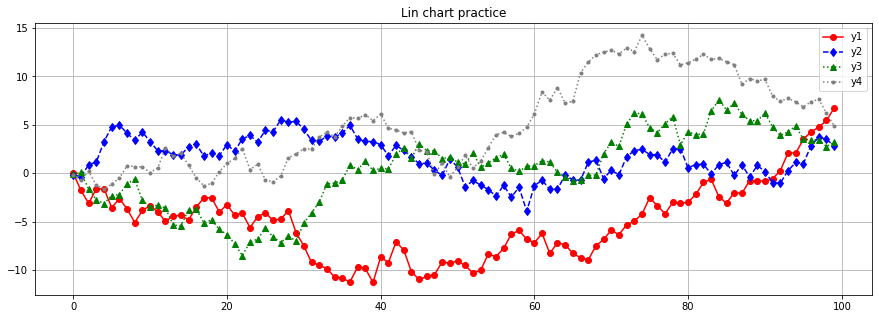

In [43]:
x = np.arange(0, 100, 1)
y1 = np.random.randn(100).cumsum()
y2 = np.random.randn(100).cumsum()
y3 = np.random.randn(100).cumsum()
y4 = np.random.randn(100).cumsum()

plt.figure(figsize=(15, 5))   ## 사이즈 지정
plt.plot(x, y1, 'red', label = 'y1', marker = 'o')     ## 레이블, 라인스타일, 마커 지정 
plt.plot(x, y2, 'blue', label = 'y2', linestyle = '--', marker = 'd')
plt.plot(x, y3, 'green', label = 'y3', linestyle = ':', marker = '^')
plt.plot(x, y4, 'grey', label = 'y4', linestyle = ':', marker = '.')

plt.title('Lin chart practice')   ## 타이틀 지정
plt.legend(loc = 'best')          ## 범레위치 지정
plt.grid(True)                    ## 그리드 사용여부 

plt.show()

#### line style => 1)'-': 일반 / 2)'--' : 점선 / 3)':': dot
#### marker => 1)'d': diamond  / 2)'^': 삼각형  / 3)'.': dot 

In [ ]:
## seaborn 활용하기 

In [48]:
tips = pd.read_csv('examples/tips.csv')
tips.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 6 columns):
total_bill    244 non-null float64
tip           244 non-null float64
smoker        244 non-null object
day           244 non-null object
time          244 non-null object
size          244 non-null int64
dtypes: float64(2), int64(1), object(3)
memory usage: 11.5+ KB


In [49]:
tips.head()

,total_bill,tip,smoker,day,time,size
0,16.99,1.01,No,Sun,Dinner,2
1,10.34,1.66,No,Sun,Dinner,3
2,21.01,3.50,No,Sun,Dinner,3
3,23.68,3.31,No,Sun,Dinner,2
4,24.59,3.61,No,Sun,Dinner,4


In [52]:
## 먼저 seaborn을 쓰지않고 그리는 경우 ... 
## crosstab으로 요일(day)와 팀 인원수(size)간 교차테이블 작성 
party_count = pd.crosstab(tips['day'], tips['size'])
party_count

size,1,2,3,4,5,6
day,,,,,,
Fri,1,16,1,1,0,0
Sat,2,53,18,13,1,0
Sun,0,39,15,18,3,1
Thur,1,48,4,5,1,3


In [55]:
## 인원수가 1인, 6인인 케이스는 제외
party_count2 = party_count.loc[:,2:5] 
party_count2

size,2,3,4,5
day,,,,
Fri,16,1,1,0
Sat,53,18,13,1
Sun,39,15,18,3
Thur,48,4,5,1


In [57]:
## 정규화 (각 row의 합이 1이 되도록 변환)
party_norm = party_count2.div(party_count2.sum(1), axis = 0)
party_norm

size,2,3,4,5
day,,,,
Fri,0.888889,0.055556,0.055556,0.000000
Sat,0.623529,0.211765,0.152941,0.011765
Sun,0.520000,0.200000,0.240000,0.040000
Thur,0.827586,0.068966,0.086207,0.017241


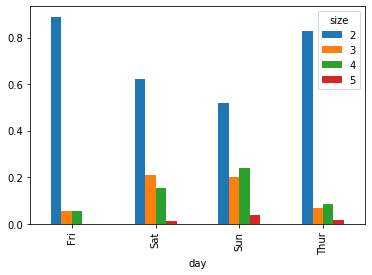

In [58]:
party_norm.plot.bar()

In [61]:
## seaborn으로 보다 간단하게 가능 
import seaborn as sns
sns.set(style='darkgrid')

In [62]:
tips.head()

,total_bill,tip,smoker,day,time,size
0,16.99,1.01,No,Sun,Dinner,2
1,10.34,1.66,No,Sun,Dinner,3
2,21.01,3.50,No,Sun,Dinner,3
3,23.68,3.31,No,Sun,Dinner,2
4,24.59,3.61,No,Sun,Dinner,4


In [64]:
## 음식값 대비 tip의 비중 구하여 변수로 할당 
tips['tip_ratio'] = tips['tip']  / (tips['total_bill'] - tips['tip'])
tips.head()

,total_bill,tip,smoker,day,time,size,tip_ratio
0,16.99,1.01,No,Sun,Dinner,2,0.063204
1,10.34,1.66,No,Sun,Dinner,3,0.191244
2,21.01,3.50,No,Sun,Dinner,3,0.199886
3,23.68,3.31,No,Sun,Dinner,2,0.162494
4,24.59,3.61,No,Sun,Dinner,4,0.172069


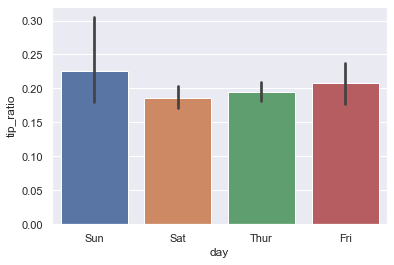

In [74]:
sns.barplot(data = tips, x = 'day', y = 'tip_ratio')

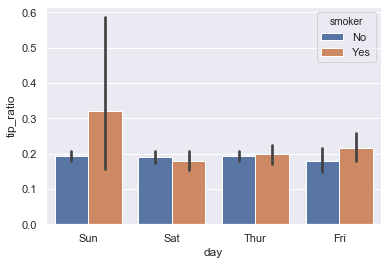

In [67]:
sns.barplot(data = tips, x = 'day', y = 'tip_ratio', hue = 'smoker' )

(0.15, 0.25)

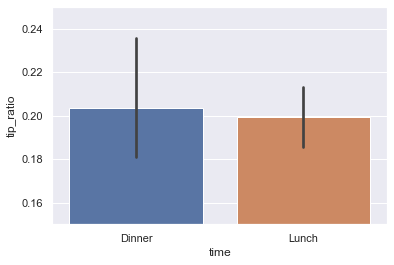

In [79]:
sns.barplot(data = tips, x = 'time', y = 'tip_ratio')
plt.ylim(0.15, 0.25)

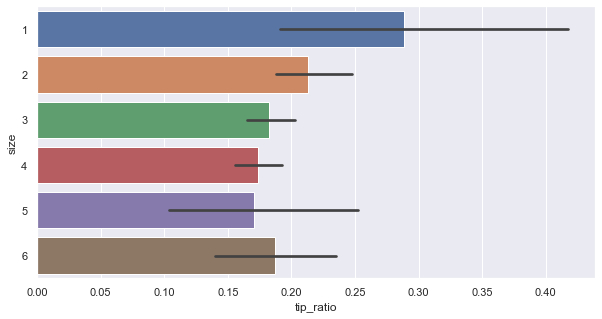

In [85]:
## orient = 'h'로 가로막대 차트 생성 
plt.figure(figsize=(10, 5))   ## 사이즈 지정
sns.barplot(data = tips, y = 'size', x = 'tip_ratio', orient = 'h' )
#sns.barplot(data = tips, y = 'day', x = 'tip_ratio', hue = 'size', orient = 'h' )

In [93]:
## histogram 구간수 결정을 위해 변수의 통계량 확인
tips['tip_ratio'].describe()

count    244.000000
mean       0.202123
std        0.163385
min        0.036955
25%        0.148274
50%        0.183110
75%        0.236821
max        2.452381
Name: tip_ratio, dtype: float64

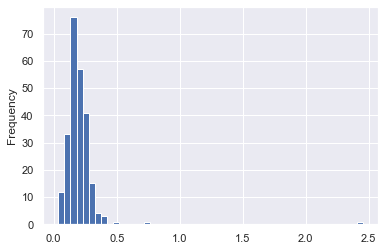

In [88]:
## histogram 그리기 
tips['tip_ratio'].plot.hist(bins=50)

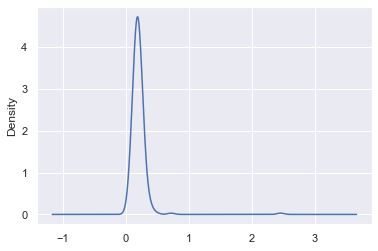

In [89]:
## 누적확률곡선 그리기 
tips['tip_ratio'].plot.density()

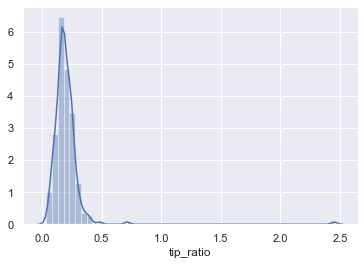

In [94]:
## distplot으로 히스토그램과 누적확률 곡선 동시에 그리기 
sns.distplot(tips['tip_ratio'], bins = 50 )

In [105]:
data1 = np.random.normal(0, 1, size=100) ## mean = 0, std=1인 정규분포로 부터 100개 샘플링 
data2 = np.random.normal(10, 2, size=200) 
data3 = np.concatenate([data1, data2])  ## 데이터 합치기 

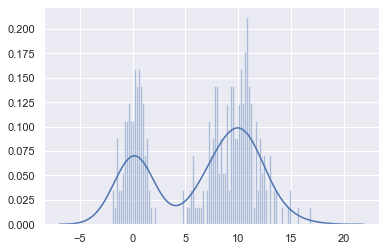

In [111]:
sns.distplot(data3, bins=100)

In [112]:
## 산포도 만들기 
macro = pd.read_csv('examples/macrodata.csv')
macro.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 203 entries, 0 to 202
Data columns (total 14 columns):
year        203 non-null float64
quarter     203 non-null float64
realgdp     203 non-null float64
realcons    203 non-null float64
realinv     203 non-null float64
realgovt    203 non-null float64
realdpi     203 non-null float64
cpi         203 non-null float64
m1          203 non-null float64
tbilrate    203 non-null float64
unemp       203 non-null float64
pop         203 non-null float64
infl        203 non-null float64
realint     203 non-null float64
dtypes: float64(14)
memory usage: 22.3 KB


In [113]:
macro.head()

,year,quarter,realgdp,realcons,realinv,realgovt,realdpi,cpi,m1,tbilrate,unemp,pop,infl,realint
0,1959.0,1.0,2710.349,1707.4,286.898,470.045,1886.9,28.98,139.7,2.82,5.8,177.146,0.00,0.00
1,1959.0,2.0,2778.801,1733.7,310.859,481.301,1919.7,29.15,141.7,3.08,5.1,177.830,2.34,0.74
2,1959.0,3.0,2775.488,1751.8,289.226,491.260,1916.4,29.35,140.5,3.82,5.3,178.657,2.74,1.09
3,1959.0,4.0,2785.204,1753.7,299.356,484.052,1931.3,29.37,140.0,4.33,5.6,179.386,0.27,4.06
4,1960.0,1.0,2847.699,1770.5,331.722,462.199,1955.5,29.54,139.6,3.50,5.2,180.007,2.31,1.19


In [115]:
data = macro[['cpi','m1','tbilrate','unemp']]
data.head()

,cpi,m1,tbilrate,unemp
0,28.98,139.7,2.82,5.8
1,29.15,141.7,3.08,5.1
2,29.35,140.5,3.82,5.3
3,29.37,140.0,4.33,5.6
4,29.54,139.6,3.50,5.2


In [116]:
## 변수들을 로그변환&차분  
trans_data = np.log(data).diff().dropna()
trans_data.head()

,cpi,m1,tbilrate,unemp
1,0.005849,0.014215,0.088193,-0.128617
2,0.006838,-0.008505,0.215321,0.038466
3,0.000681,-0.003565,0.125317,0.055060
4,0.005772,-0.002861,-0.212805,-0.074108
5,0.000338,0.004289,-0.266946,0.000000


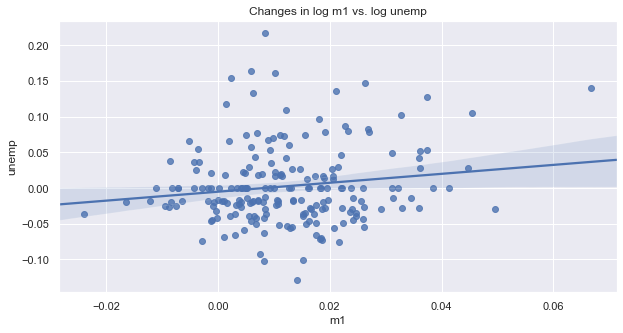

In [125]:
plt.figure(figsize=(10,5))
plt.title('Changes in log %s vs. log %s' %('m1', 'unemp'))

sns.regplot(data = trans_data, x = 'm1', y = 'unemp')

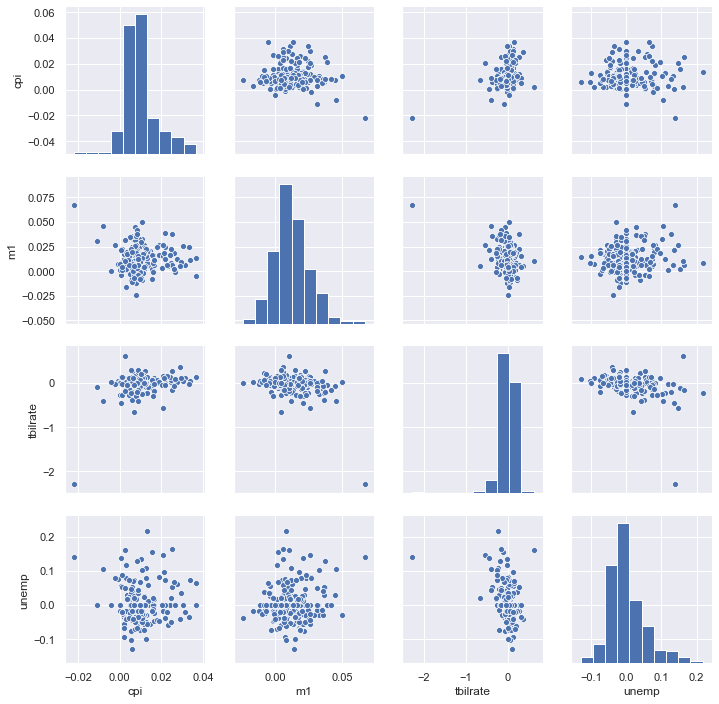

In [126]:
## pairplot으로 변수들간의 산점도를 한번에 그리기 
sns.pairplot(data = trans_data)

In [127]:
## catplot 활용하기 
tips.head()

,total_bill,tip,smoker,day,time,size,tip_ratio
0,16.99,1.01,No,Sun,Dinner,2,0.063204
1,10.34,1.66,No,Sun,Dinner,3,0.191244
2,21.01,3.50,No,Sun,Dinner,3,0.199886
3,23.68,3.31,No,Sun,Dinner,2,0.162494
4,24.59,3.61,No,Sun,Dinner,4,0.172069


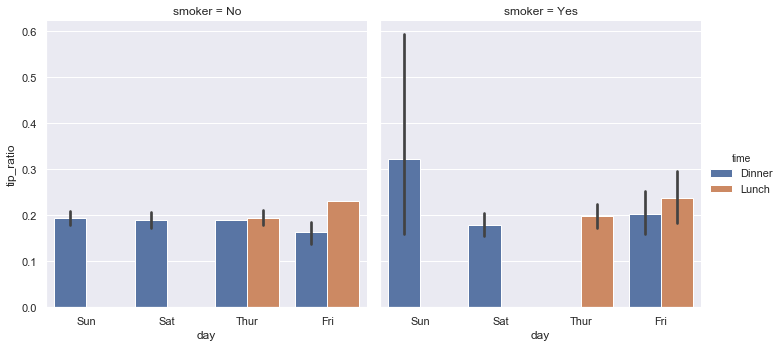

In [133]:
### catplot에서는 row와 col을 지정할 수 있다.
sns.catplot(data=tips, x='day', y='tip_ratio', hue ='time', col='smoker', kind = 'bar')

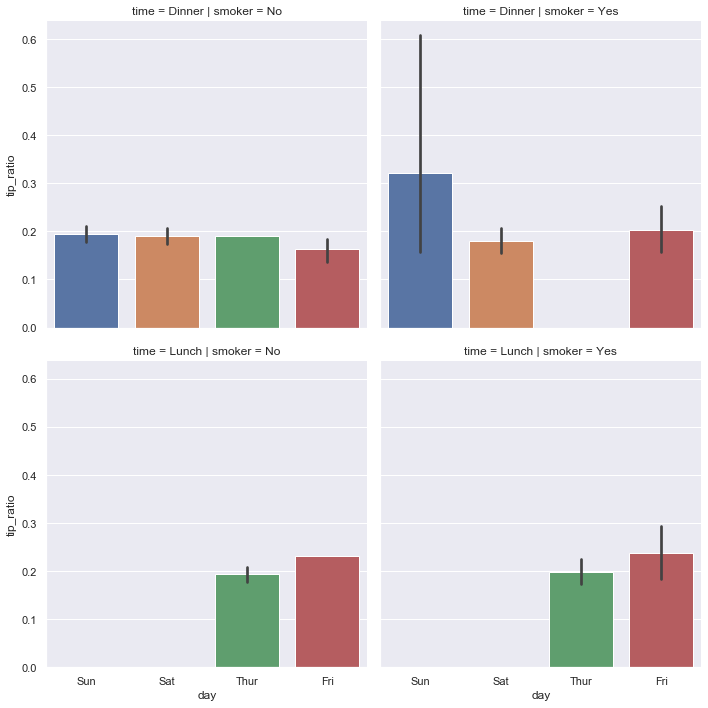

In [135]:
sns.catplot(data=tips, x='day', y='tip_ratio', row='time', col='smoker', kind = 'bar')

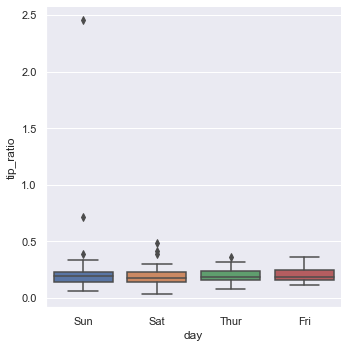

In [143]:
## box-plot 
sns.catplot(data=tips, x='day', y='tip_ratio', kind = 'box')

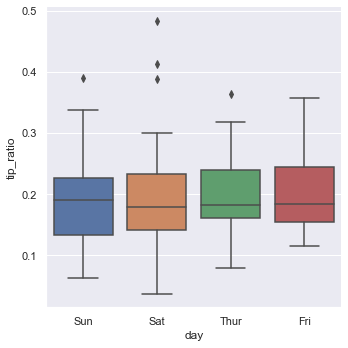

In [145]:
## tip_ratio가 0.5을 초과하는 것은 제외하고 ... 
sns.catplot(data=tips[tips.tip_ratio < 0.5], x='day', y='tip_ratio', kind = 'box')